# Linear Regression Gradient Descent Hardcoded
In this notebook, we are going to hardcode the linear regression algorithm with gradient descent (no use of libraries like scikit-learn and such).

## Imports + comfigurations
In here, we are going to import our dependencies.

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from math import sqrt

In here, we import our data.<br>
The dataset represents the changes in temperature during the world war 2.<br>
I got the data from kaggle: __[Weather World War 2](https://www.kaggle.com/smid80/weatherww2)__.

In [3]:
data = pd.read_csv("datasets/weather_ww2/Summary of Weather.csv", delimiter=',', low_memory=False)
data.fillna(0,inplace=True)
data = data.sample(frac=1)
data.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
91484,34101,1944-1-9,0,0.0,12.222222,-2.222222,5.000000,0,0,44,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
32325,11902,1944-8-1,8.636,0.0,32.222222,22.777778,27.777778,0,0,44,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
12376,10718,1945-3-20,0,0.0,34.444444,23.333333,28.888889,0,0,45,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
110693,80509,1945-5-14,7.366,0.0,30.555556,22.777778,26.666667,0,0,45,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
67073,32501,1944-8-25,0,0.0,31.111111,22.222222,26.666667,0,0,44,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0


In [4]:
data.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,...,119040.0,119040.0,119040.0,119040.0,119040.000000,119040.0,119040.0,119040.0,119040.0,119040.0
mean,29659.435795,0.168818,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,0.120884,0.091154,...,0.0,0.0,0.0,0.0,0.053300,0.0,0.0,0.0,0.0,0.0
std,20953.209402,2.611819,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,2.069915,1.410269,...,0.0,0.0,0.0,0.0,0.886512,0.0,0.0,0.0,0.0,0.0
min,10001.000000,0.000000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
25%,11801.000000,0.000000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
50%,22508.000000,0.000000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
75%,33501.000000,0.000000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,0.0,0.0,0.0,0.0,23.900000,0.0,0.0,0.0,0.0,0.0


## Representing the data
Now we select the rows we are going to use.

In [5]:
columns = ['MaxTemp','MinTemp']
filteredColumns = data[columns]
filteredColumns.describe()

,MaxTemp,MinTemp
count,119040.000000,119040.000000
mean,27.045111,17.789511
std,8.717817,8.334572
min,-33.333333,-38.333333
25%,25.555556,15.000000
50%,29.444444,21.111111
75%,31.666667,23.333333
max,50.000000,34.444444


We print a plot graph representing the data.

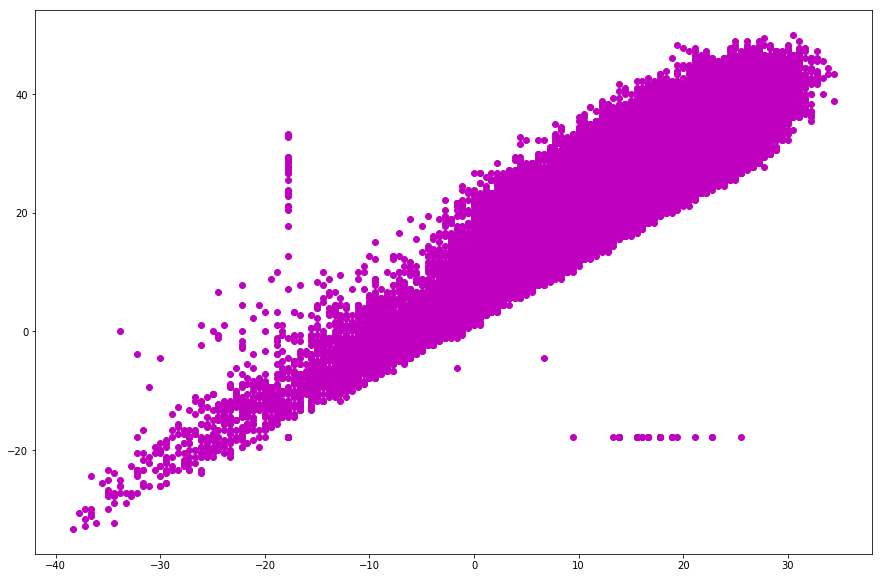

In [6]:
plt.figure(figsize=(15,10))
x = filteredColumns['MinTemp']
y = filteredColumns['MaxTemp']
plt.plot(x,y,'mo')

## Simple linear regression using Gradient Descent
We first declare our Error function. We are going to use the __[Mean Squared Error(MSE)](https://en.wikipedia.org/wiki/Mean_squared_error)__ to evaluate our prediction.<br>
The Mean Squared Error equation is:<br>
$$
\begin{align*}
MSE &= \frac{1}{N}\sum_{i=1}^N(Y_i - \hat{Y})^2
\end{align*}
$$

In [7]:
# Calculate mean squared error
def mean_squared_error(actual_values, predicted_values):
    sum_value = .0
    for i in range(len(actual_values)):
        sum_value += ((predicted_values[i] - actual_values[i]) ** 2)
        
    return sum_value/float(len(actual_values))

### Implementation of gradient descent
First of all, we need to explain what's __gradient descent__. Simply put, it's a method to find the lowest Y value for a given function. In our case, we need to __minimize__ the __Mean Squared Error__ function to find the best line that fits our data. <br><br>
To do that, we need to calculate the __partial derivative__ of our function with respect to both m and b. As we know, a 0 derivative means that we are either in a local minima, or a local maxima. Which means that __the closer we get to 0 the better__.<br><br>
The equation of our line:
$$
\begin{align*}
Y &= mX + b \\
\end{align*}
$$
<br>
The __Mean Squared Error__ function after we replace $\hat{Y}$ with the function:
$$
\begin{align*}
MSE &= \frac{1}{n}\sum_{i=1}^N(Y_i - (mX_i + b))^2
\end{align*}
$$
<br>
Now we calculate the __partial derivative__ of our __Mean Squared Error__ function: <br><br>
$$
\begin{align*}
\frac{\partial}{\partial m} &= \frac{2}{N}\sum_{i=1}^N-X_i(Y_i-(mX_i + b)) \\\\
\frac{\partial}{\partial b} &= \frac{2}{N}\sum_{i=1}^N-(Y_i-(mX_i + b))
\end{align*}
$$
<br>
The process of finding the optimal values for m and b is to then __minimize__ our derivatives. To do that we use the __gradient descent__ formula:
$$
\begin{align*}
a_{n+1} &= a_{n} - \gamma \frac{\partial}{\partial a_{n}}f(a_n)
\end{align*}
$$
Where:<br>
$\gamma$ : the learning rate<br>
$a_{n+1}$ : the new value<br>
$a_n$ : the old value<br>
$f(a_n)$ : the function we are looking to minimize

In [8]:
# calculate the gradient of one step
def step_gradient(x,y,b_current=0,m_current=0,learning_rate=.0001):
    N = float(len(x))
    m_gradient = 0
    b_gradient = 0
    for i in range(len(x)):
        b_gradient += -(2/N) * (y[i] - (m_current * x[i] + b_current))
        m_gradient += -(2/N) * x[i] * (y[i] - (m_current * x[i] + b_current))
    b_next = b_current - (learning_rate * b_gradient)
    m_next = m_current - (learning_rate * m_gradient)
    return b_next , m_next

In here, we are creating the gradient descent runner.

In [9]:
# function to run gradient descent for n iterations
def gradient_descent_runner(x,y,b_start=0,m_start=0,learning_rate=.0001,num_iteration=1000):
    b_now = b_start
    m_now = m_start
    for i in range(num_iteration):
        b_now, m_now = step_gradient(x,y,b_now,m_now,learning_rate)
    return b_now, m_now

We declare a function to split our data as training and testing.

In [10]:
# function for splitting the data into training and testing
def split_data(x,train_split_rate = .5):
    train_x = x.iloc[:int(round(len(x)*train_split_rate))]
    test_x = x.iloc[int(round(len(x)*train_split_rate)):]
    
    train_x.index = range(len(train_x))
    test_x.index = range(len(test_x))
    
    return train_x, test_x

Now we define our starting values of m and b and the epochs (how many iterations to do).

In [11]:
epochs = 1000
b_start = 0
m_start = 0

We split our data.

In [12]:
# splitting the data
train_data, test_data = split_data(data,train_split_rate=.5)
train_x, test_x = train_data['MinTemp'], test_data['MinTemp']
train_y, test_y = train_data['MaxTemp'], test_data['MaxTemp']

We create an init function, and a run function for matplotlib animation.

In [13]:
# linear regression plot function
def plot_linear_regression_result(x,y,predicted_y):
    # plotting the actual points as a scatter
    plt.figure(figsize=(12,8))
    plt.scatter(x,y,color = "y", marker = "o",s=30)
    
    # plotting the regression line
    plt.plot(x, predicted_y, color = "m", linewidth=2)
 
    # putting labels
    plt.title('Linear regression of Min/Max Temperature during World War 2')
    plt.xlabel('Min Temperature')
    plt.ylabel('Max Temperature')
 
    # function to show plot
    plt.show()

# generator parameters
iteration = 0

# plot parameters


# a generator function to generate the parameters for our gradient descent animation function
def generator_function():
    
    iteration += 1
    return []
    
# we create our plot
def init_function():
    return None
    